##**Crimes analysis in Boston (USA)**

The analysis is intented to give the answer about Boston (USA) crime data.

The original dataset can be found at Kaggle at https://www.kaggle.com/AnalyzeBoston/crimes-in-boston/code and contains statistics of crimes committed in Boston (USA) over three years, i.e. between 2015 and 2018.

It consists of the following variables:

- **Offense Code** - it is a given code of an incident;
- **Offense Code Group** - it is a code for offence's group;
- **Offense Description** - it is a description of the committed crime;
- **District** - it is a place where the crime was committed;
- **Incident Number** - it is a given number of crime ;
- **Reporting Area** - area where the crime was committed;
- **Shooting** - is a type of incident;
- **Occured On Date** - it is a date when the crime was committed;
- **Year** - it is a year when the crime was committed;
- **Month** - it is a month when the crime was committed;
- **Day Of Week** - it is a day when the crime was committed;
- **Hour** - it is an hour when the crime was committed;
- **UCR Part**;
- **Street** - it is a name of street where the crime was committed;
- **Lat** - it is the latitude of the place where the crime was committed;
- **Long** - it is the longitude of the place where the crime was committed.

The analysis is mostly aimed to answer in a few questions:

- Is it possible to predict where or when a crime will be committed?
- How has crime changed over the years?
- Does the frequency of crimes change over the day? Week? Year?
- What types of crimes are most common?
- In which area most crimes are committed?

and last but not least

- Which areas of the city have evolved over this time span?

In this approach I am going to do some exploratory analysis to understand the nature of data about crimes and the underlying distribution in particular to resolve the goals/problems assumed and to answer to all of above questions.

The analysis was performed in two steps:

- **I.** Viewing the data state wise from different angles -  EDA analysis and data visualization;
- **II.** Presenting findings and drawing conclusions.


### Importing libraries and downloading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from numpy import random, float, array
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
import missingno as msno
import re

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
cd "/content/drive/My Drive/Colab Notebooks/crimes"

/content/drive/My Drive/Colab Notebooks/crimes


Some preliminary information about analyzed dataset

In [ ]:
df = pd.read_csv('crime.csv', encoding = "ISO-8859-1")
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
df2 = pd.read_csv('offense_codes.csv', encoding = "ISO-8859-1")
df2.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


##**Step I.** Viewing the data state wise from different angles 

##**Exploratory Data Analysis and data visualization**

In [ ]:
#shape of data
df.shape

(319073, 17)

Checking number of columns:

In [ ]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [ ]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

Checking the missing values in data:

In [ ]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

There are few variables with missing values, so let's try to visualize them.

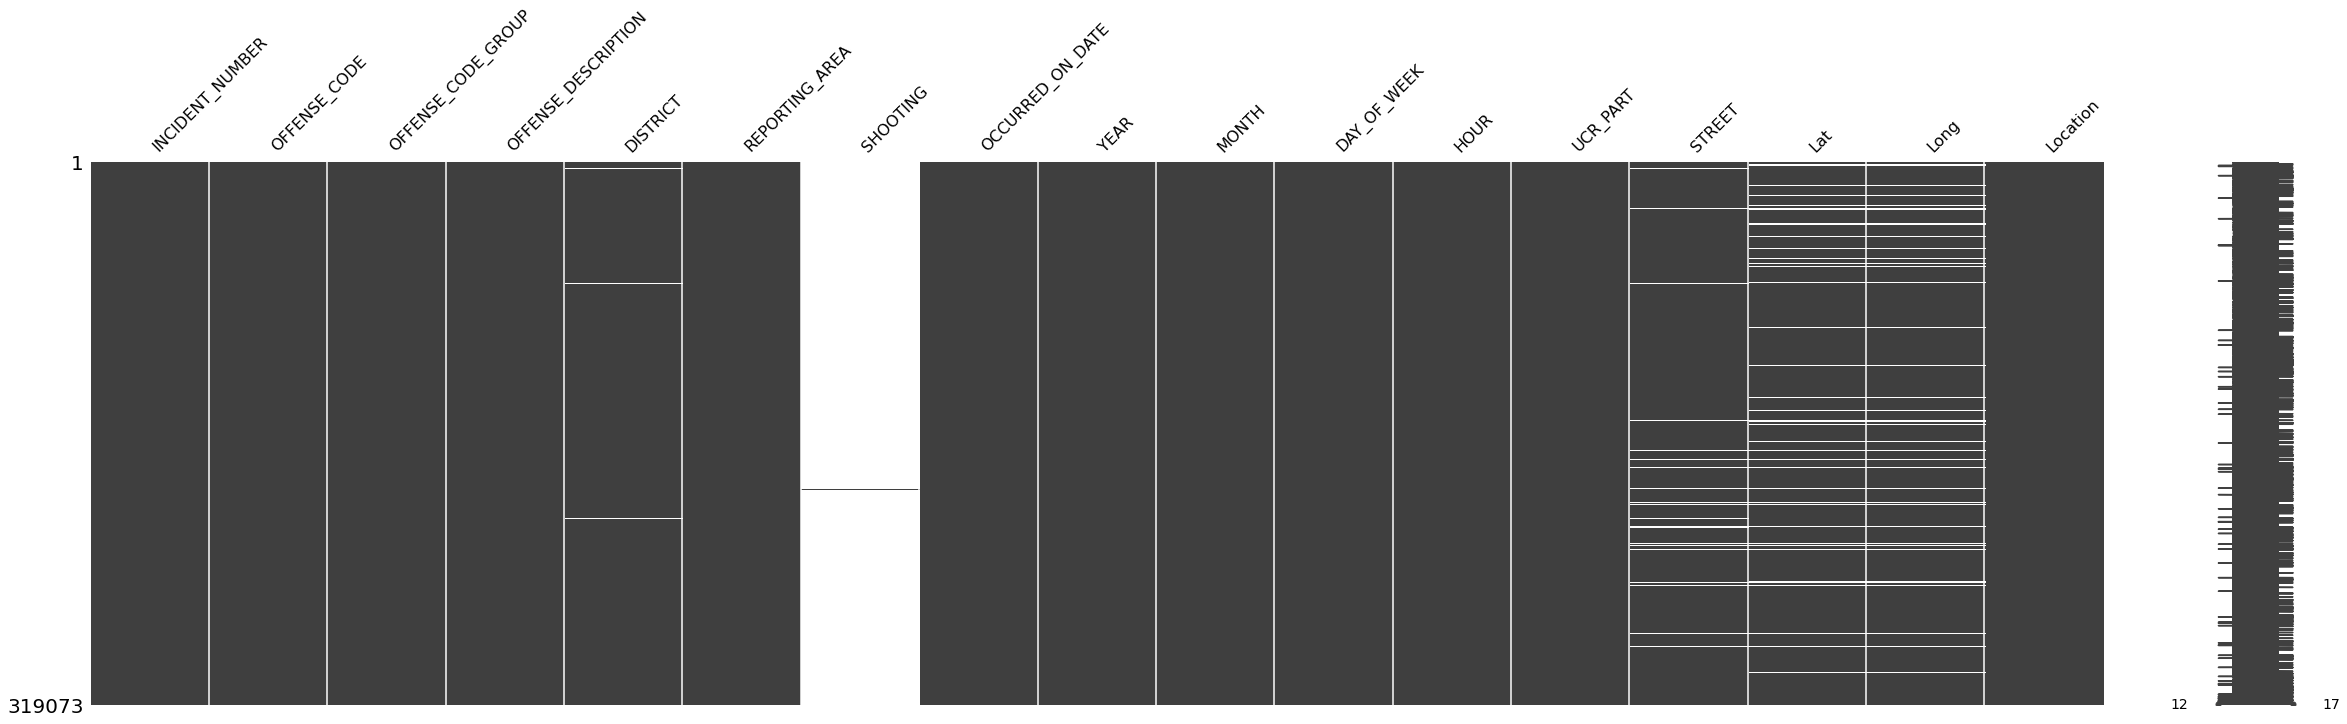

In [ ]:
msno.matrix(df, figsize = (40,10))
plt.show()

Checking information about the second dataset:

In [ ]:
df2.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [ ]:
df2.shape

(576, 2)

In [ ]:
df2.columns

Index(['CODE', 'NAME'], dtype='object')

### Data cleaning

Now I will fill all of empty values so that they are useful in further analysis. 'DISTRICT' and 'UCR_PART' variables I will fill with the modal value. The null values in 'SHOOTING' I replace with 'N' which  means 'No shooting'. The lacks in the 'STREET' variable I will fill by 'Not identified'.

In [ ]:
df['DISTRICT'].value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

In [ ]:
df['DISTRICT'] = df['DISTRICT'].fillna(df['DISTRICT'].mode().iloc[0])

In [ ]:
df['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [ ]:
df['SHOOTING'] = df['SHOOTING'].fillna(value='N')

In [ ]:
df['UCR_PART'].value_counts()

Part Three    158553
Part Two       97569
Part One       61629
Other           1232
Name: UCR_PART, dtype: int64

In [ ]:
df['UCR_PART'] = df['UCR_PART'].fillna(df['UCR_PART'].mode().iloc[0])

In [ ]:
df['STREET'].fillna('Not identified', inplace=True)

In [ ]:
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

In [ ]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

I will drop the OFFENSE CODE since it is not necessary

In [ ]:
df = df.drop(['OFFENSE_CODE'], axis=1)

Now I will change the DAY OF WEEK variable, rename the name of particular variables to get them more readable and I will drop duplicates in INCIDENT_NUMBER variable.

In [ ]:
df["DAY_OF_WEEK"] = pd.Categorical(df["DAY_OF_WEEK"], 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

In [ ]:
rename = {'OFFENSE_CODE_GROUP':'Group',
          'OFFENSE_DESCRIPTION':'Description',
          'DISTRICT':'District',
          'STREET':'Street',        
          'OCCURRED_ON_DATE':'Date',
          'YEAR':'Year',
          'MONTH':'Month',
          'DAY_OF_WEEK':'Day',
          'HOUR':'Hour'}

df.rename(index=str, columns=rename, inplace=True)

In [ ]:
df.drop_duplicates(subset="INCIDENT_NUMBER", inplace=True)

I check how my dataset looks like

In [ ]:
df.head()

,INCIDENT_NUMBER,Group,Description,District,REPORTING_AREA,SHOOTING,Date,Year,Month,Day,Hour,UCR_PART,Street,Lat,Long,Location
0,I182070945,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### **Data analysis**

Now let's check how looks like the top of 5 most common committed crimes:

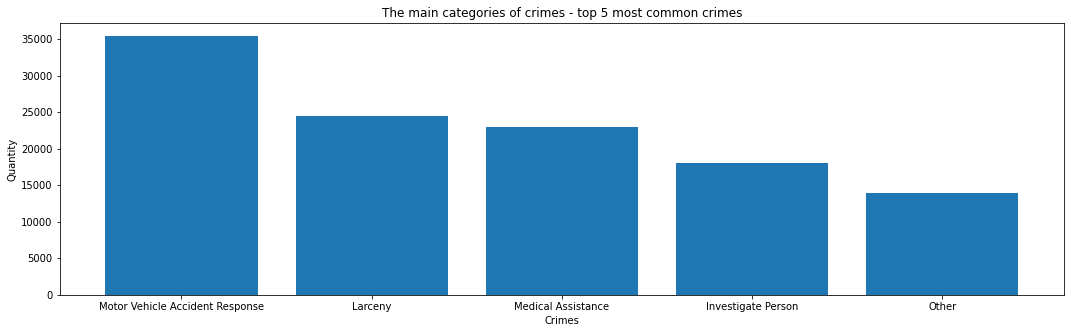

In [ ]:
lista_offense_code_group = df['Group'].value_counts()
dict_offense_code_group = lista_offense_code_group[0:5].to_dict()

names_offense_code_group = dict_offense_code_group.keys()
values_offense_code_group = dict_offense_code_group.values()

plt.figure(figsize=[18,5])
plt.title('The main categories of crimes - top 5 most common crimes')
plt.xlabel('Crimes')
plt.ylabel('Quantity')
plt.bar(names_offense_code_group, values_offense_code_group);

UCR Part One which covers the most serious offenses:

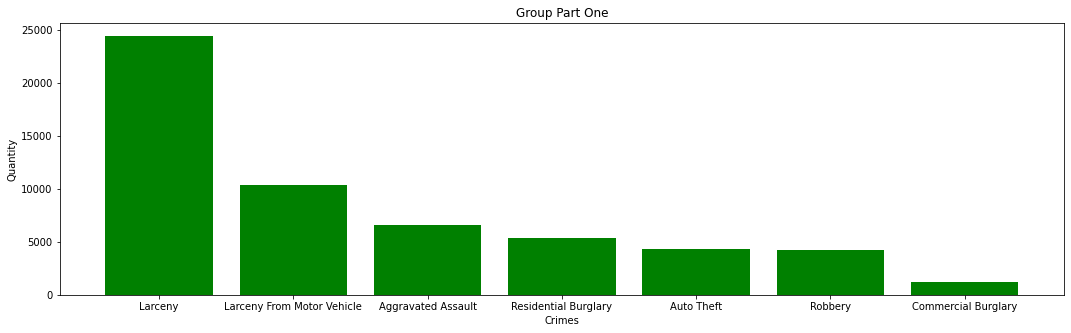

In [ ]:
df_part_one = df.loc[df['UCR_PART'] == 'Part One']

lista_offense_group_one = df_part_one['Group'].value_counts()
dict_offense_group_one = lista_offense_group_one[0:7].to_dict()

names_offense_group_one = dict_offense_group_one.keys()
values_offense_group_one = dict_offense_group_one.values()

plt.figure(figsize=[18,5])
plt.title('Group Part One')
plt.xlabel('Crimes')
plt.ylabel('Quantity')
plt.bar(names_offense_group_one, values_offense_group_one, color='green');

I check how it looks like in the UCR Part Two:

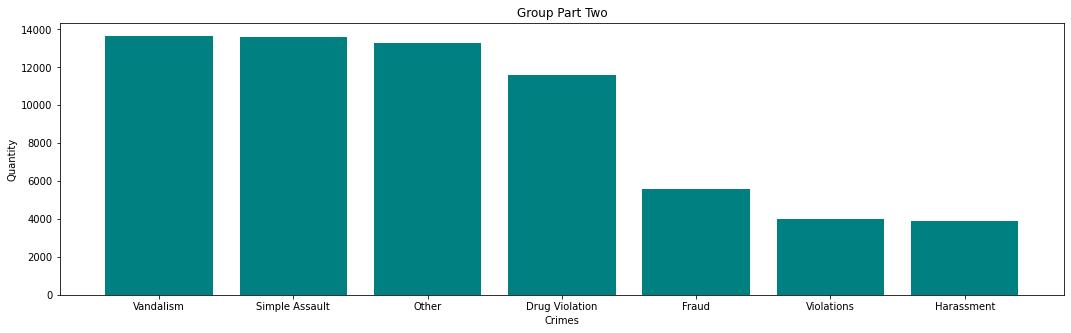

In [ ]:
df_part_two = df.loc[df['UCR_PART'] == 'Part Two']

lista_offense_group_two = df_part_two['Group'].value_counts()
dict_offense_group_two = lista_offense_group_two[0:7].to_dict()

names_offense_group_two = dict_offense_group_two.keys()
values_offense_group_two = dict_offense_group_two.values()

plt.figure(figsize=[18,5])
plt.title('Group Part Two')
plt.xlabel('Crimes')
plt.ylabel('Quantity')
plt.bar(names_offense_group_two, values_offense_group_two, color='teal');

And in the UCR Part Three:

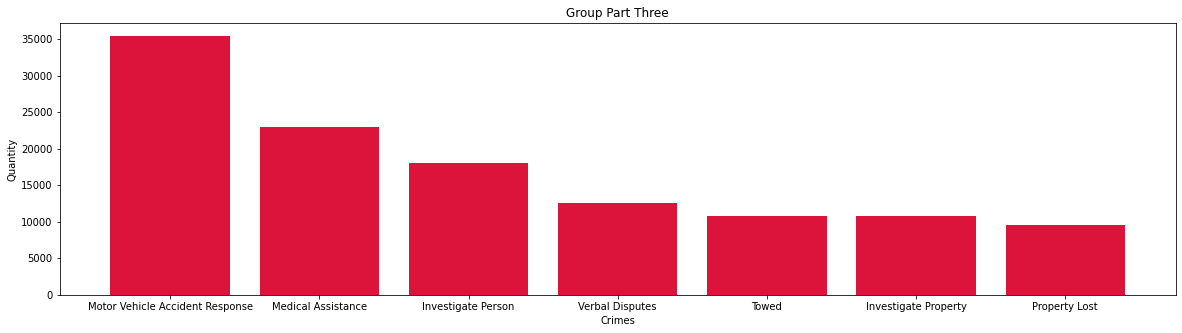

In [ ]:
df_part_three = df.loc[df['UCR_PART'] == 'Part Three']

lista_offense_group_three = df_part_three['Group'].value_counts()
dict_offense_group_three = lista_offense_group_three[0:7].to_dict()

names_offense_group_three = dict_offense_group_three.keys()
values_offense_group_three = dict_offense_group_three.values()

plt.figure(figsize=[20,5])
plt.title('Group Part Three')
plt.xlabel('Crimes')
plt.ylabel('Quantity')
plt.bar(names_offense_group_three, values_offense_group_three, color='crimson');

Now I will check how many crimes was committed in particular districts:

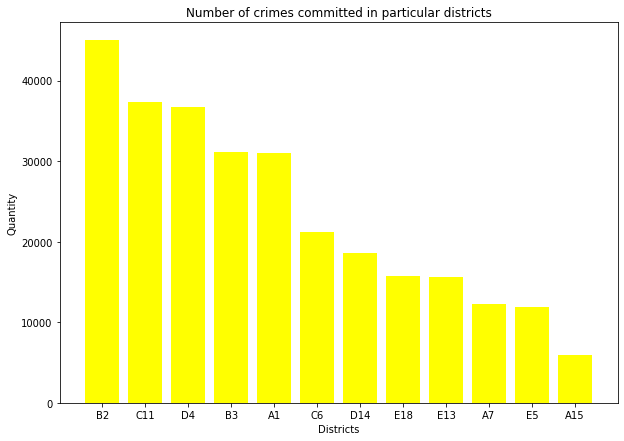

In [ ]:
lista_district = df['District'].value_counts()
dict_district = lista_district.to_dict()

names_district = dict_district.keys()
values_district = dict_district.values()

plt.figure(figsize=[10,7])
plt.title('Number of crimes committed in particular districts')
plt.xlabel('Districts')
plt.ylabel('Quantity')
plt.bar(names_district, values_district, color='yellow');

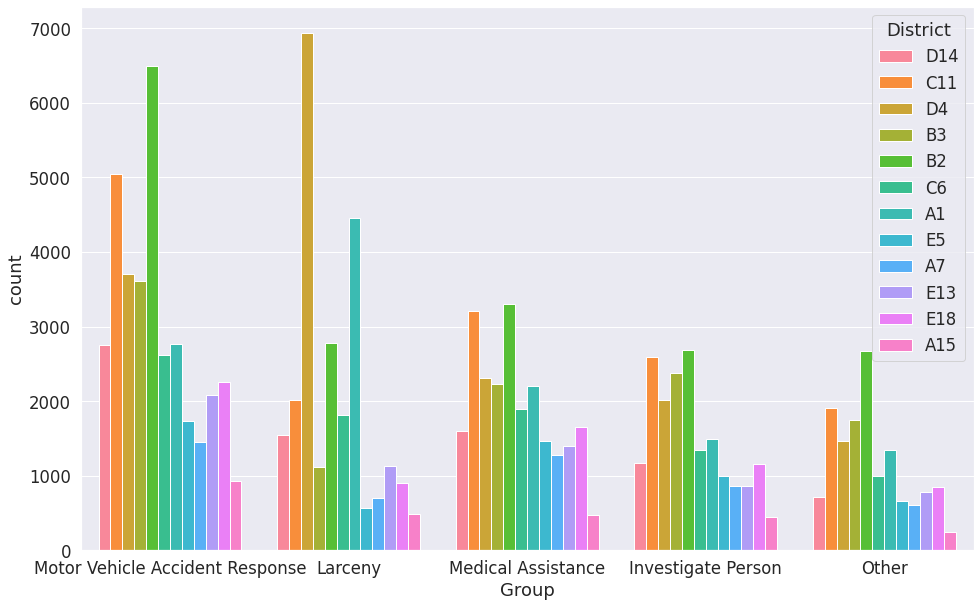

In [ ]:
plt.figure(figsize=[16,10])
sns.set(font_scale=1.5)
order = df['Group'].value_counts().head(5).index
sns.countplot(data = df, x='Group',hue='District', order = order,  saturation=2,linewidth=1);

Next step is to check how many crimes was committed in particular hours:

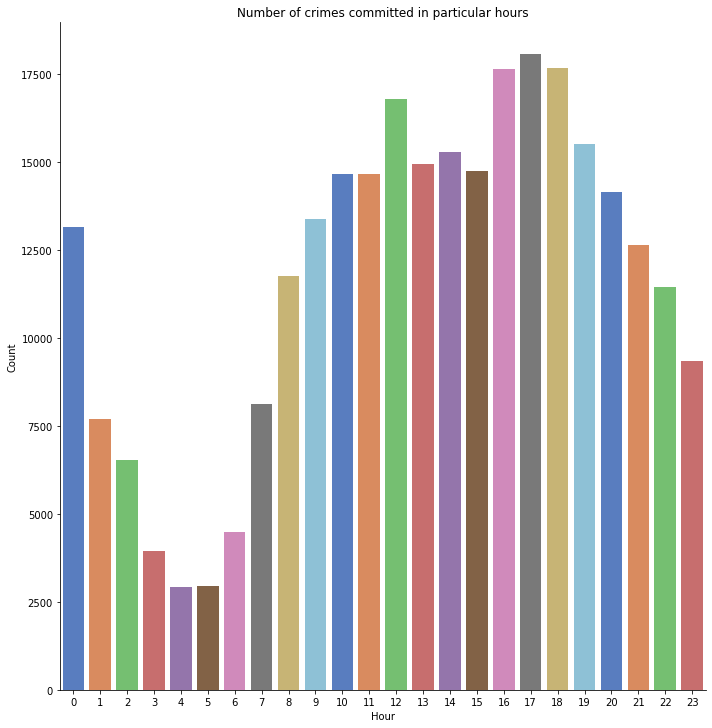

In [ ]:
sns.catplot(x="Hour", kind="count", height=10, palette="muted", data=df)
plt.title('Number of crimes committed in particular hours')
plt.xlabel("Hour")
plt.ylabel('Count');

The same as above but in particular days:

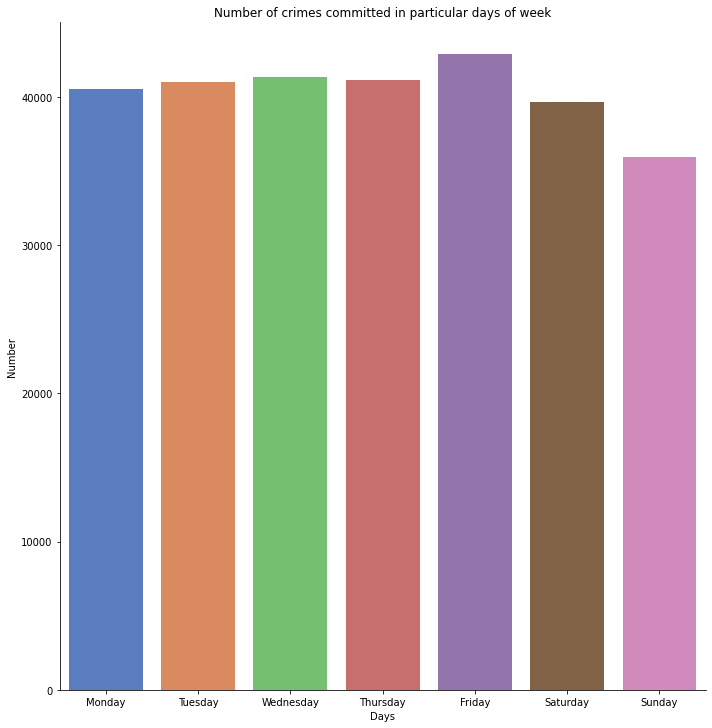

In [ ]:
sns.catplot(x="Day", kind="count", height=10, palette="muted", data=df)
plt.title('Number of crimes committed in particular days of week')
plt.xlabel("Days")
plt.ylabel('Number');

And in particular months of year:

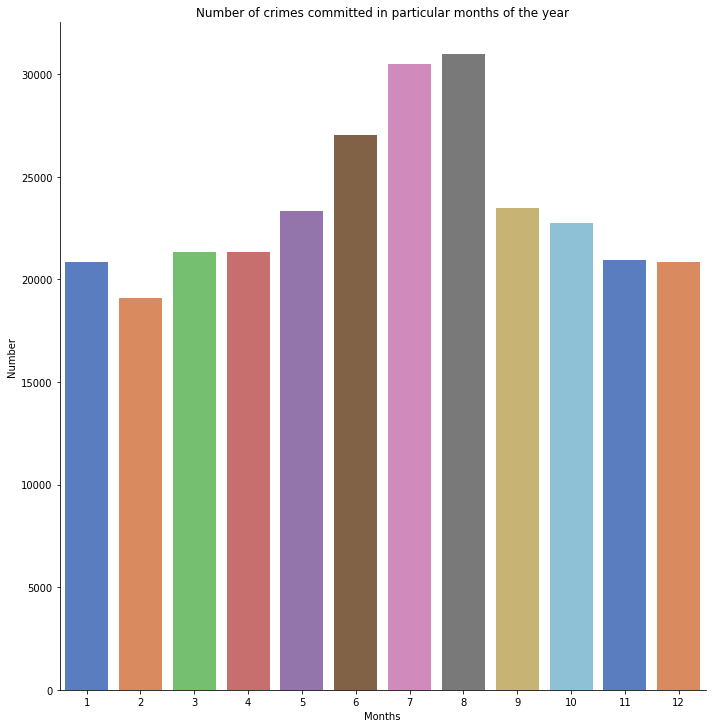

In [ ]:
sns.catplot(x="Month", kind="count", height=10, palette="muted", data=df)
plt.title('Number of crimes committed in particular months of the year')
plt.xlabel("Months")
plt.ylabel('Number');

Number of crimes committed in particular years:

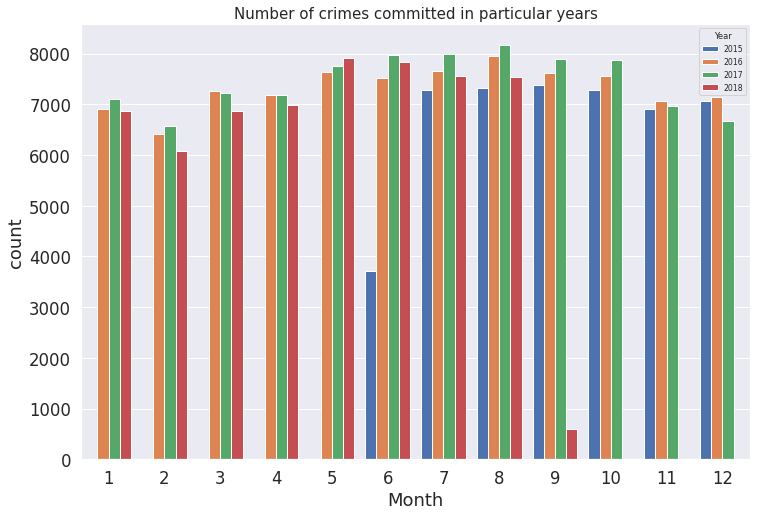

In [ ]:
plt.figure(figsize=[12,8])
plt.title('Number of crimes committed in particular years', fontsize=15)
sns.set(font_scale=0.7)
sns.countplot(data = df, x='Month',hue='Year',  saturation=2,linewidth=1)
plt.show();

 Distribution of Crimes:

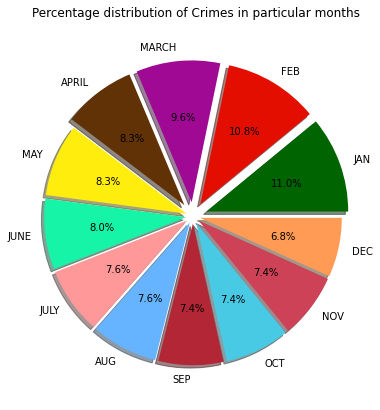

In [ ]:
labels = ['JAN', 'FEB','MARCH','APRIL','MAY','JUNE', 'JULY', 'AUG', 'SEP','OCT','NOV','DEC']
sizes = df['Month'].value_counts()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff', "#B32636", "#48cae4", "#ce4257", "#ff9b54"]
explode = (0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage distribution of Crimes in particular months")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,7)
plt.show()

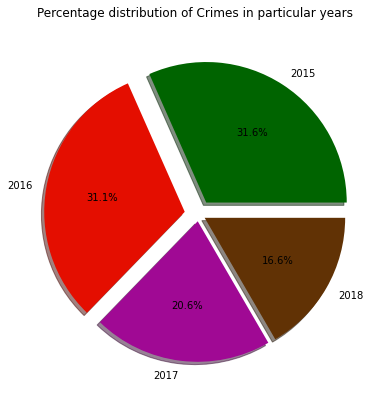

In [ ]:
labels = ['2015','2016','2017','2018']
sizes = df['Year'].value_counts()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.05,0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage distribution of Crimes in particular years")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,7)
plt.show()

### **Box and violin Charts to checking for outliers in our numerical variables**

*Checking for outliers in the year column:*

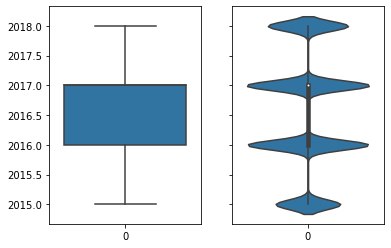

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Year'], ax=axes[0]);
sns.violinplot(data=df['Year'], ax=axes[1]);

From box and violin plots we see that the most crimes are committed between 2016 and 2017. But there are few unique crimes committed in different years than the rest. It is worth to noting that this fact maybe correlated with missing data for the first 5 months in 2015 and for the last three months in 2018. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

*Checking for outliers in the month column:*

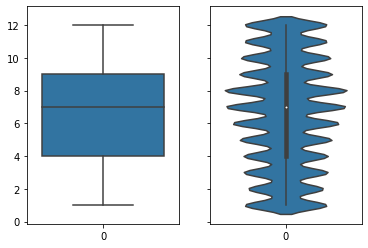

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Month'], ax=axes[0]);
sns.violinplot(data=df['Month'], ax=axes[1]);

From box and violin plots we see that the most crimes are committed between April and September. But there are few unique crimes committed in different months than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

*Checking for outliers in the hour column:*

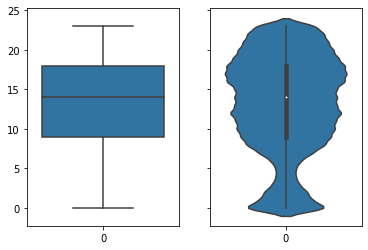

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Hour'], ax=axes[0]);
sns.violinplot(data=df['Hour'], ax=axes[1]);

From box and violin plots we see that the most crimes are committed in a small hour range, i.e. between 10 and 19. But there are few unique crimes committed in different hours than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

*Checking for outliers in the Lat column:*

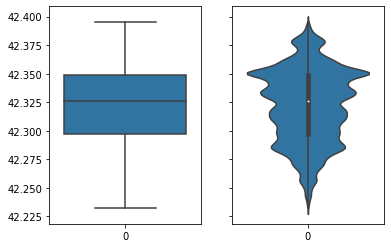

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Lat'], ax=axes[0]);
sns.violinplot(data=df['Lat'], ax=axes[1]);

From box and violin plots we see that the most crimes are committed in a small area, i.e. Lat between 42.325 and 42.350. But there are few unique crimes having greater Lat or smaller Lat than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

*Checking for outliers in the Long column:*

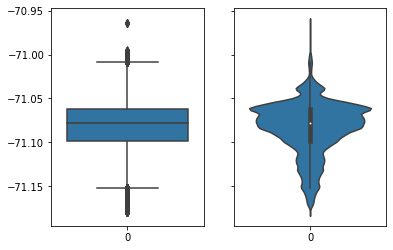

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Long'], ax=axes[0]);
sns.violinplot(data=df['Long'], ax=axes[1]);

From box and violin plots we see that the most crimes are committed in a small area, i.e. Long between 71.10 and 71.04. But there are few unique crimes having greater Long or smaller Long than the rest, i.e. there are committed in different areas. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

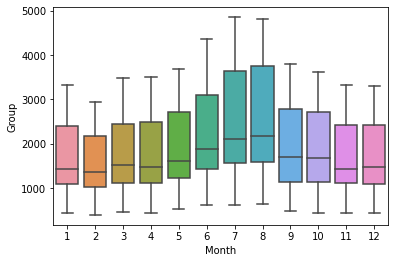

In [ ]:
grouped = df.groupby(['Month','District']).count()
sns.boxplot(x ="Month", y = "Group", data = grouped.reset_index());

### Descriptive analysis

In [ ]:
# Checking statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,282517.0,2016.562692,0.995500,2015.000000,2016.000000,2017.000000,2017.000000,2018.000000
Month,282517.0,6.612420,3.272773,1.000000,4.000000,7.000000,9.000000,12.000000
Hour,282517.0,13.145545,6.254045,0.000000,9.000000,14.000000,18.000000,23.000000
Lat,265270.0,42.322385,0.032095,42.232413,42.297521,42.325887,42.348624,42.395042
Long,265270.0,-71.083079,0.030137,-71.178674,-71.098065,-71.077799,-71.062340,-70.963676


Now I can plot a heatmap of co-relations between features which will help us get more insights.

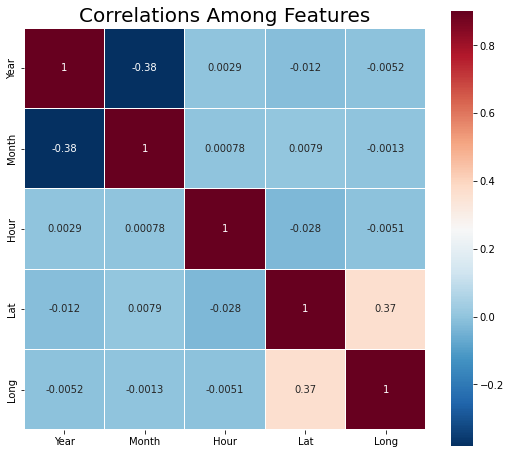

In [ ]:
plt.subplots(figsize = (9,8))
sns.heatmap(df.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

**Analysis of longitude and latitude**

Now let's check how the distribution of crimes will be look like if we take under consideration the longitude and latitude. In the first case I chceck the UCR Part One

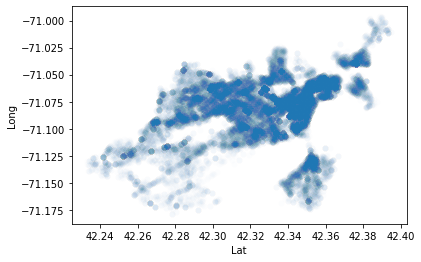

In [ ]:
plt.figure(figsize=[6,4])
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=df_part_one)
plt.show();

Now I check the UCR Part Two

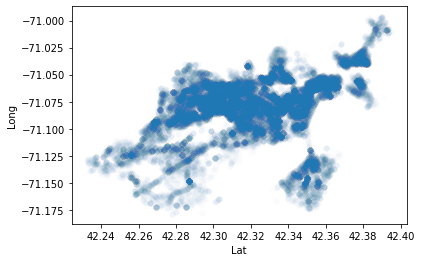

In [ ]:
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=df_part_two);

And finally the UCR Part Three

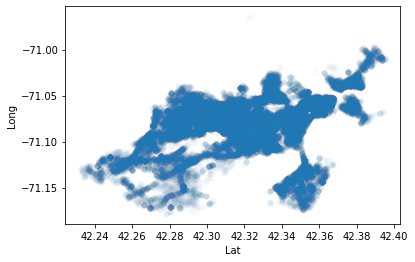

In [ ]:
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=df_part_three);

So let's check how the distribution of crimes will be look like of the entire dataset divided into particular districts

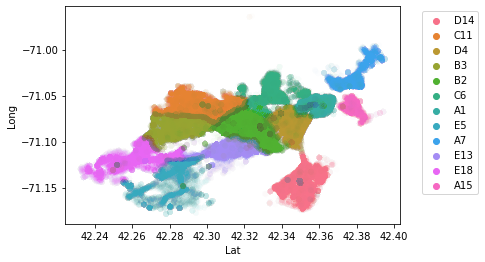

In [ ]:
sns.scatterplot(x='Lat',
               y='Long',
               hue='District',
               alpha=0.01,
               data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Let's check how the distribution of crimes will be look like of the entire dataset divided into particular days of week

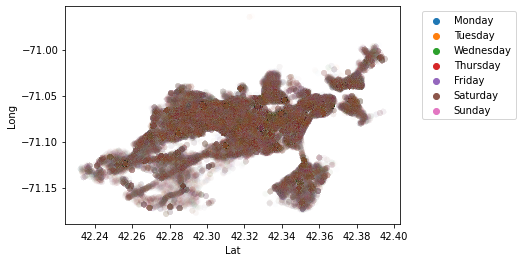

In [ ]:
sns.scatterplot(x='Lat',
               y='Long',
               hue='Day',
               alpha=0.01,
               data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Let's check how the distribution of crimes will be look like of the entire dataset divided into particular months of year

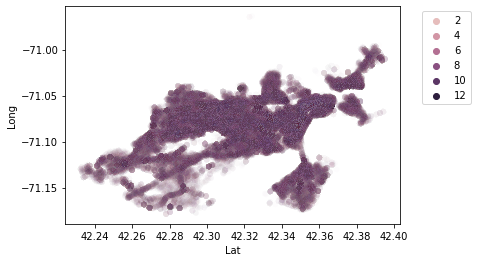

In [ ]:
sns.scatterplot(x='Lat',
               y='Long',
               hue='Month',
               alpha=0.01,
               data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Let's check how the distribution of crimes will be look like of the entire dataset divided into particular years

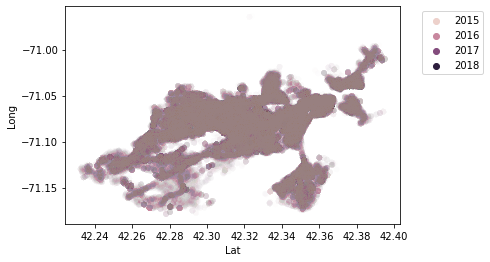

In [ ]:
sns.scatterplot(x='Lat',
               y='Long',
               hue='Year',
               alpha=0.01,
               data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

##**Step II.** Conclusions with presentation of the main findings

In this study I have investigated the crimes committed in Boston over three years, i.e. between 2015 and 2018. The analysis was mostly aimed to answer the following questions:

- Is it possible to predict where or when a crime will be committed?
- How has crime changed over the years?
- Does the frequency of crimes change over the day? Week? Year?
- What types of crimes are most common?
- In which area most crimes are committed?

and last but not least

- Which areas of the city have evolved over this time span?

After examination if our dataset has any missing values and checking the features within it and their data types,I begin with the EDA analysis. In this study EDA analysis is a cue to help us to answer to all of above questions. So let's back to them. The answer to question **"Is it possible to predict where or when a crime will be committed?"** is positive. First of all let's see that the most crime is committed in the city center (i.e.where) and what is more Friday, Saturday night and weekday lunch and departure times are the most prone to crime (i.e. when).

In turn the question **"How has crime changed over the years?"** is correlated with the answer to the next question (see note that the lowest crime rate was in 2015, the year 2017 was the year with the highest crime rate while the crime rate was decreased in 2018).

To answer to question **"Does the frequency of crimes change over the day? Week? Year?"** it is enough to note that the highest crime rate is seen on Friday (i.e. day). It seems that the crime was triggered by the fact that many people were out on Friday night due to Saturday being a holiday. Other days there is no significant difference, but Sunday has the lowest rate. The months with the highest crime rates vary according to years, an increase can be was observed in the summer months. The year 2017 was the year with the highest crime rate while the crime rate was decreasing in 2018 (i.e. year). It is worth to noting that this fact maybe correlated with missing data for the first 5 months in 2015 and for the last three months in 2018.

The answer to question **"What types of crimes are most common?"** is positive and is easily readable from the distribution of the crimes (the graph illustrating 5 of the most commonly committed crimes). In this graph one can see that the most committed crimes are: Motor Vehicle Accident Response, Larceny, Medical Assistance Group and Investigate Person.

The answer of **"In which area most crimes are committed?"** may be embraced by the distribution of the crimes committed in districs. It is clear to see that there are districts with the highest crime rates (the highest number of crimes) i.e. **B2, C11 and D4**. In other words the most crime is committed in the **city center**. The same thing is easy readable from the longitude and latitude graphs divided by particular districts. 